In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('Crime_prone_dataset.csv')

In [4]:
data


,District,Event,Circle,Police Station,Caller Source,Event Type,Event Sub-Type,Create Date/Time,Latitude,Longitude
0,LUCKNOW,P01042100004,C1,PS1,PHONE,Information Against Police,Misbehavior By Prv,01-04-2021 00:00,26.834,81.008
1,LUCKNOW,P01042104316,C1,PS1,PHONE,Threat In Person,Attack,01-04-2021 12:09,26.828,81.014
2,LUCKNOW,P01042104847,C1,PS1,PHONE,Dispute,Dispute In Hospital,01-04-2021 12:51,26.840,81.009
3,LUCKNOW,P01042105074,C1,PS1,PHONE,Gambling,Play Cards,01-04-2021 13:10,26.828,81.002
4,LUCKNOW,P01042105152,C1,PS1,PHONE,Threat In Person,Attack,01-04-2021 13:18,26.834,81.033
...,...,...,...,...,...,...,...,...,...,...
5123,LUCKNOW,P30062111143,C2,PS4,PHONE,Dispute,With Neighbor,30-06-2021 17:59,26.866,81.026
5124,LUCKNOW,P30062111164,C2,PS4,PHONE,Dispute,Dispute Between Ride And Driver,30-06-2021 18:01,26.864,81.006
5125,LUCKNOW,P30062111341,C2,PS4,PHONE,Cyber Crimes,Bank Account Hacking,30-06-2021 18:10,26.864,80.998
5126,LUCKNOW,P30062111700,C2,PS4,PHONE,Robbery,On Road,30-06-2021 18:33,26.873,81.023


In [5]:
polic_station = set(data['Police Station'])
polic_station

{'PS1', 'PS2', 'PS3', 'PS4'}

In [6]:
event_type = set(data['Event Type'])
event_type

{'Accident',
 'Accident Explosive',
 'Animals Related',
 'Animals Smugling',
 'Assault/Riot/Commotion',
 'Attempted Murder',
 'Child Crime',
 'Child Crime(Sexual Abuse)',
 'Corona',
 'Crime On Phone Mobile Social Media Internet',
 'Cyber Crimes',
 'Dacoity',
 'Differently Abled People',
 'Dispute',
 'Domestic Violence',
 'Dowry Related Crime',
 'Election Offences-Violation Of Model Code Of Conduct',
 'Encroachment',
 'Escort For Safety',
 'Excise Act Offenses',
 'Female Harrassment',
 'Female Sexual Harrassment',
 'Forgery',
 'Found Deadbody',
 'Gambling',
 'Human Trafficking',
 'Illegal Mining',
 'Information Against Other Government Departments',
 'Information Against Police',
 'Kidnap',
 'Major Fire',
 'Medium Fire',
 'Missing',
 'Murder',
 'Ndps Act Offenses',
 'Personally Threat',
 'Pick Pocket',
 'Police Help Required By 108',
 'Police Help Required By 1090',
 'Pollution',
 'Property Disputes',
 'Robbery',
 'Small Fire',
 'Sos',
 'Suicide',
 'Suicide Attempt',
 'Suspicious Object

In [7]:
event = set(data['Event'])
circle = set(data['Circle'])
caller_source = set(data['Caller Source'])
event_subType = set(data['Event Sub-Type'])

In [8]:
len(event)

5128

In [9]:
len(caller_source)

8

In [10]:
caller_source

{'1090',
 'CITZNAPP',
 'EMRI108',
 'NERS112',
 'PHONE',
 'SMS',
 'TWITTER',
 'WhatsApp'}

In [11]:
len(event_subType)

203

In [12]:
crime_rates = []
for i in range(len(polic_station)):
    crime_rates.append(0)

In [13]:
crime_rates

[0, 0, 0, 0]

In [14]:
data.set_index('Police Station', inplace = True)

In [15]:
for i in polic_station:
    print(len(data.loc[i]))

709
753
1250
2416


In [18]:
not_crime = ['Accident', 'Accident Explosive', 'Corona', 'Differently Abled People', 'Major Fire', 'Medium Fire',
            'Pollution', 'Small Fire', 'Traffic Jam', 'Unclaimed Information', 'Unknown']
data_event = pd.read_csv('Crime_prone_dataset.csv', index_col = 'Event Type')
for i in not_crime:
    data_event.drop(i, inplace = True)

In [19]:
data_event.head()

,District,Event,Circle,Police Station,Caller Source,Event Sub-Type,Create Date/Time,Latitude,Longitude
Event Type,,,,,,,,,
Information Against Police,LUCKNOW,P01042100004,C1,PS1,PHONE,Misbehavior By Prv,01-04-2021 00:00,26.834,81.008
Threat In Person,LUCKNOW,P01042104316,C1,PS1,PHONE,Attack,01-04-2021 12:09,26.828,81.014
Dispute,LUCKNOW,P01042104847,C1,PS1,PHONE,Dispute In Hospital,01-04-2021 12:51,26.840,81.009
Gambling,LUCKNOW,P01042105074,C1,PS1,PHONE,Play Cards,01-04-2021 13:10,26.828,81.002
Threat In Person,LUCKNOW,P01042105152,C1,PS1,PHONE,Attack,01-04-2021 13:18,26.834,81.033


In [20]:
data_police_station = data_event.set_index('Police Station')
data_police_station

,District,Event,Circle,Caller Source,Event Sub-Type,Create Date/Time,Latitude,Longitude
Police Station,,,,,,,,
PS1,LUCKNOW,P01042100004,C1,PHONE,Misbehavior By Prv,01-04-2021 00:00,26.834,81.008
PS1,LUCKNOW,P01042104316,C1,PHONE,Attack,01-04-2021 12:09,26.828,81.014
PS1,LUCKNOW,P01042104847,C1,PHONE,Dispute In Hospital,01-04-2021 12:51,26.840,81.009
PS1,LUCKNOW,P01042105074,C1,PHONE,Play Cards,01-04-2021 13:10,26.828,81.002
PS1,LUCKNOW,P01042105152,C1,PHONE,Attack,01-04-2021 13:18,26.834,81.033
...,...,...,...,...,...,...,...,...
PS4,LUCKNOW,P30062111143,C2,PHONE,With Neighbor,30-06-2021 17:59,26.866,81.026
PS4,LUCKNOW,P30062111164,C2,PHONE,Dispute Between Ride And Driver,30-06-2021 18:01,26.864,81.006
PS4,LUCKNOW,P30062111341,C2,PHONE,Bank Account Hacking,30-06-2021 18:10,26.864,80.998


In [21]:
crime_rates = {}
for i in polic_station:
    crime_rates[i] = len(data_police_station.loc[i])

In [22]:
crime_rates

{'PS1': 604, 'PS4': 609, 'PS2': 1001, 'PS3': 2057}

In [23]:
import matplotlib.pyplot as plt

In [24]:
crime_rate_num = list(crime_rates.values())
areas = list(crime_rates.keys())
crime_rate_num

[604, 609, 1001, 2057]

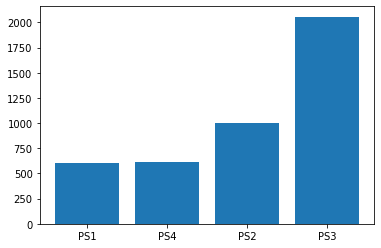

In [25]:
plt.bar(range(len(areas)), crime_rate_num, tick_label=areas)
plt.show()

In [26]:
crimes = [i for i in event_type if i not in not_crime]

In [27]:
data_circle = data.set_index('Circle', 'Police Station')

In [28]:
data_circle

,District,Event,Caller Source,Event Type,Event Sub-Type,Create Date/Time,Latitude,Longitude
Circle,,,,,,,,
C1,LUCKNOW,P01042100004,PHONE,Information Against Police,Misbehavior By Prv,01-04-2021 00:00,26.834,81.008
C1,LUCKNOW,P01042104316,PHONE,Threat In Person,Attack,01-04-2021 12:09,26.828,81.014
C1,LUCKNOW,P01042104847,PHONE,Dispute,Dispute In Hospital,01-04-2021 12:51,26.840,81.009
C1,LUCKNOW,P01042105074,PHONE,Gambling,Play Cards,01-04-2021 13:10,26.828,81.002
C1,LUCKNOW,P01042105152,PHONE,Threat In Person,Attack,01-04-2021 13:18,26.834,81.033
...,...,...,...,...,...,...,...,...
C2,LUCKNOW,P30062111143,PHONE,Dispute,With Neighbor,30-06-2021 17:59,26.866,81.026
C2,LUCKNOW,P30062111164,PHONE,Dispute,Dispute Between Ride And Driver,30-06-2021 18:01,26.864,81.006
C2,LUCKNOW,P30062111341,PHONE,Cyber Crimes,Bank Account Hacking,30-06-2021 18:10,26.864,80.998
